# PART 1: DATA LOADING & PREPROCESSING


## Load Dataset and Dependencies

**Purpose:** Import essential Python libraries for data analysis.


**Libraries Used:**

- **pandas (pd):** Powerful data manipulation library for working with structured data (DataFrames and Series). We'll use it to load, clean, and analyze our breast cancer dataset.**Why This Step:** Before working with data, we need to import the tools that will help us read CSV files, manipulate data structures, and perform mathematical operations.

- **numpy (np):** Numerical computing library for mathematical operations on arrays. Essential for matrix operations and numerical calculations throughout the ML pipeline.

In [32]:
import pandas as pd
import numpy as np

## Load Breast Cancer Dataset

**Purpose:** Load the Wisconsin Breast Cancer Diagnostic dataset from CSV file and inspect its structure.

**Dataset Details:**
- **Source:** Wisconsin Breast Cancer Diagnostic dataset (WBCD)

- **Samples:** 569 patients (212 malignant, 357 benign)

- **Features:** 32 columns total:- Displays dataset shape (rows × columns), column names, and first 5 rows for inspection

  - `id`: Patient ID number- `df.loc[:, ~df.columns.str.contains('^Unnamed')]`: Removes any unnamed/empty columns that might exist in the CSV

  - `diagnosis`: M (Malignant) or B (Benign) - our target variable- `pd.read_csv()`: Reads the CSV file into a pandas DataFrame

  - 30 numeric features describing cell nuclei characteristics**Code Explanation:**



**Feature Groups (10 characteristics × 3 measurements each):**Radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension

1. **Mean values (_mean):** Average of measurements**10 Cell Characteristics Measured:**

2. **Standard error (_se):** Variability of measurements  
3. **Worst values (_worst):** Largest/most severe measurements

In [33]:
df = pd.read_csv('../data/BreastCancer.csv')

# Drop any unnamed/empty columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}, Columns: {df.shape[1]}")
print(f"\nColumn names:\n{df.columns.tolist()}")
df.head()

Dataset shape: (569, 32)
Rows: 569, Columns: 32

Column names:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Prepare Target Variable - Binary Encoding

**Purpose:** Convert the categorical diagnosis column from letters (M/B) to numbers (1/0) for machine learning algorithms.

**Encoding Scheme:**
- **M (Malignant)** → **1** (Positive class - cancer present)

- **B (Benign)** → **0** (Negative class - no cancer)

- This slight imbalance is acceptable for most ML algorithms

**Why This Matters:**- Distribution showing approximately 37% Malignant (212 cases) and 63% Benign (357 cases)

- Machine learning algorithms require numeric input, not text**Expected Output:**

- Binary encoding (0/1) is standard for classification problems

- This makes M the "positive" class we're trying to detect (cancer diagnosis)- Shows both absolute numbers and percentages to understand class balance

- `.value_counts()`: Counts how many of each class we have

**Code Explanation:**- `df['diagnosis'].map({'M': 1, 'B': 0})`: Transforms each diagnosis value using the mapping dictionary

In [34]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

counts = df['diagnosis'].value_counts()
percentages = counts / len(df) * 100

print("Diagnosis distribution:")
print(counts)
print(f"\nMalignant: {counts[1]} ({percentages[1]:.1f}%)")
print(f"Benign: {counts[0]} ({percentages[0]:.1f}%)")


Diagnosis distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64

Malignant: 212 (37.3%)
Benign: 357 (62.7%)


## Check Data Quality - Missing Values & Data Types

**Purpose:** Perform quality control checks to ensure data integrity before building models.

**What We're Checking:**


1. **Missing Values (NaN/null):**

   - Count how many missing values exist in each column- Wrong data types can cause computation errors

   - Missing data can cause errors in ML algorithms- Missing values require special handling (imputation or removal)

   - Need to identify columns with incomplete data- Clean data = reliable models

**Why This Matters:**

2. **Data Types:**

   - Verify all feature columns are numeric (float64 or int64)- ID column might be int64 (whole numbers)

   - Ensures mathematical operations will work correctly- All 30 feature columns should be float64 (decimal numbers)

   - Identifies any unexpected text or mixed-type columns- "No missing values found" - this dataset is typically complete

**Expected Result:**

**Code Explanation:**

- `df.isnull().sum()`: Counts missing values per column- `df.dtypes.value_counts()`: Summarizes how many columns of each type (int, float, object)
- `missing_count[missing_count > 0]`: Shows only columns with missing data

In [35]:
print("Missing values per column:")
missing_count = df.isnull().sum()
print(missing_count[missing_count > 0])
if missing_count.sum() == 0:
    print("No missing values found")
print("\nData types:")
print(df.dtypes.value_counts())

Missing values per column:
Series([], dtype: int64)
No missing values found

Data types:
float64    30
int64       2
Name: count, dtype: int64


## Handle Missing Values - Data Cleaning

**Purpose:** Remove any incomplete records to ensure model training uses only complete, valid data.

**Strategy: Complete Case Analysis (Listwise Deletion)**
- If any row contains even one missing value, remove the entire row

- Simple and safe approach when missing data is minimal

- Alternative approaches (imputation) would be used if many rows were affected- More sophisticated imputation not needed for complete datasets

- With 569 samples, losing a few rows (if any) won't hurt performance

**Code Logic:**- Prevents algorithms from crashing on NaN values

1. `df.isnull().sum().sum()`: Count total missing values across entire dataset- Ensures all 569 samples have complete information

2. **If missing values exist:****Why This Approach:**

   - Print row count before deletion

   - `df.dropna()`: Remove rows with any NaN values- If values were dropped, we'd see before/after row counts

   - Print row count after deletion  - Likely output: "No missing values to handle" (this dataset is clean)

   - Show how many rows were dropped**Expected Outcome:**

3. **If no missing values:** Confirm dataset is complete

In [36]:
# Check if there are missing values
if df.isnull().sum().sum() > 0:
    print(f"Rows before: {len(df)}")
    df = df.dropna()
    print(f"Rows after: {len(df)}")
    print(f"Dropped {len(df) - df.shape[0]} rows with missing values")
else:
    print("No missing values to handle")

No missing values to handle


## Prepare Features and Target - Train/Test Split Preparation

**Purpose:** Separate the dataset into input features (X) and target variable (y) for supervised machine learning.

**Machine Learning Terminology:**
- **X (Features/Predictors/Independent Variables):** The measurements used to make predictions

- **y (Target/Label/Dependent Variable):** What we're trying to predict (diagnosis)

- Standard format for scikit-learn and most ML libraries

**What Gets Included:**- Proper separation prevents accidental cheating (model seeing the answer)

- ML algorithms learn patterns: "Given X features, predict y target"

**X - Feature Matrix (30 columns):****Why This Matters:**

- All 30 numeric measurements of cell nuclei characteristics

- Each row is a patient, each column is a measurement- `df['diagnosis']`: Extracts only the diagnosis column as y

- Shape: (569 rows, 30 columns)- `axis=1` means drop columns (axis=0 would drop rows)

- `df.drop(['id', 'diagnosis'], axis=1)`: Creates X by removing ID and target

**y - Target Vector (1 column):****Code Explanation:**

- Only the diagnosis column (0=Benign, 1=Malignant)

- Each value is what we're trying to predict- **diagnosis column:** Excluded from X (since it's the answer we're predicting)

- Shape: (569 rows,)- Including ID would be "data leakage" and give misleading results

- **id column:** Just a patient identifier with no predictive power
**What Gets Excluded:**

In [37]:
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures: {X.columns.tolist()}")

Feature matrix shape: (569, 30)
Target vector shape: (569,)

Features: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


## Basic Statistics - Descriptive Summary

**Purpose:** Generate comprehensive statistical summary of all numeric features to understand data distribution and scale.

**Statistics Provided (for each of 30 features):**


1. **count:** Number of non-null values (should be 569 for all)

2. **mean:** Average value - central tendency- Large scale differences affect distance-based algorithms (KNN, LogReg)

3. **std:** Standard deviation - how spread out values are- Features with different scales will need StandardScaler before training

4. **min:** Smallest value in the column**Next Steps:**

5. **25% (Q1):** First quartile - 25% of data below this

6. **50% (median):** Middle value - 50% above and below- Baseline for comparing malignant vs benign groups later

7. **75% (Q3):** Third quartile - 75% of data below this  - Helps understand which features vary most (potential predictive power)

8. **max:** Largest value in the column- Spots potential data quality issues

- Identifies features with vastly different scales (need normalization)

**What to Look For:****Why This Matters:**



**Scale Differences:**- No negative values where they don't make sense

- `area_mean` might range from 140-2500 (large numbers)- All counts should equal 569 (no missing values)

- `smoothness_mean` might range from 0.05-0.16 (small decimals)**Data Quality:**

- Indicates need for feature scaling later

- Large std relative to mean indicates high variability

**Outliers:**- If max >> 75th percentile, suggests outliers exist

In [38]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# PART 2: EXPLORATORY DATA ANALYSIS


## Import Visualization Libraries


**Purpose:** Load plotting libraries to create charts and graphs for data exploration.

- Validate assumptions before modeling

**Libraries:**- Communicate findings effectively

- **matplotlib.pyplot (plt):** Core plotting library for creating figures, axes, and basic charts- Spot outliers and anomalies visually

- **seaborn (sns):** Statistical visualization library built on matplotlib with better defaults and advanced plots- Identify relationships between features

- Understand data patterns that numbers alone can't reveal

**Configuration:****Why We Need Visualization:**

- `sns.set_style("whitegrid")`: Sets a clean white background with light gray gridlines for better readability
- `plt.rcParams['figure.figsize'] = (12, 6)`: Sets default figure size to 12 inches wide × 6 inches tall

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Visualize Target Distribution - Class Balance Analysis

**Purpose:** Create visual representations of how malignant and benign cases are distributed in our dataset.

**Why Class Distribution Matters:**


**Balanced vs Imbalanced:**

- **Balanced (50/50):** Equal representation of both classes- Our ~37/63: Acceptable, might use `stratify` parameter in train_test_split

- **Imbalanced (90/10):** One class dominates, models can become biased- If ratio is 40/60 to 60/40: Generally fine for standard ML

- **Our Dataset (~37/63):** Slightly imbalanced but acceptable- If ratio were 95/5: Consider resampling techniques

**Interpretation:**

**Impact on Model Performance:**

- Severely imbalanced data (e.g., 95/5) requires special techniques:- Color codes: `#2ecc71` = green (benign/safe), `#e74c3c` = red (malignant/danger)

  - Class weighting- `fig, axes = plt.subplots(1, 2)`: Creates 1 row, 2 columns of subplots

  - Oversampling minority class (SMOTE)- `.get(0, 0)` and `.get(1, 0)`: Safely extracts counts with default of 0 if missing

  - Undersampling majority class- `df['diagnosis'].value_counts().sort_index()`: Counts 0s and 1s, sorts to ensure 0 comes first

  - Different evaluation metrics (F1, precision/recall over accuracy)**Code Breakdown:**

- Our 37/63 split is mild enough for standard approaches

- Color-coded same as bar chart for consistency

**Visualizations Created:**- Easy to see at a glance if classes are balanced

- Shows relative proportions: ~63% Benign, ~37% Malignant

**1. Bar Chart (Count Plot):****2. Pie Chart (Percentage Distribution):**

- Shows absolute numbers: ~357 Benign, ~212 Malignant

- Y-axis = count of patients- Text labels show exact counts on each bar

- Green bars for Benign (safe/healthy)- Red bars for Malignant (cancer detected)

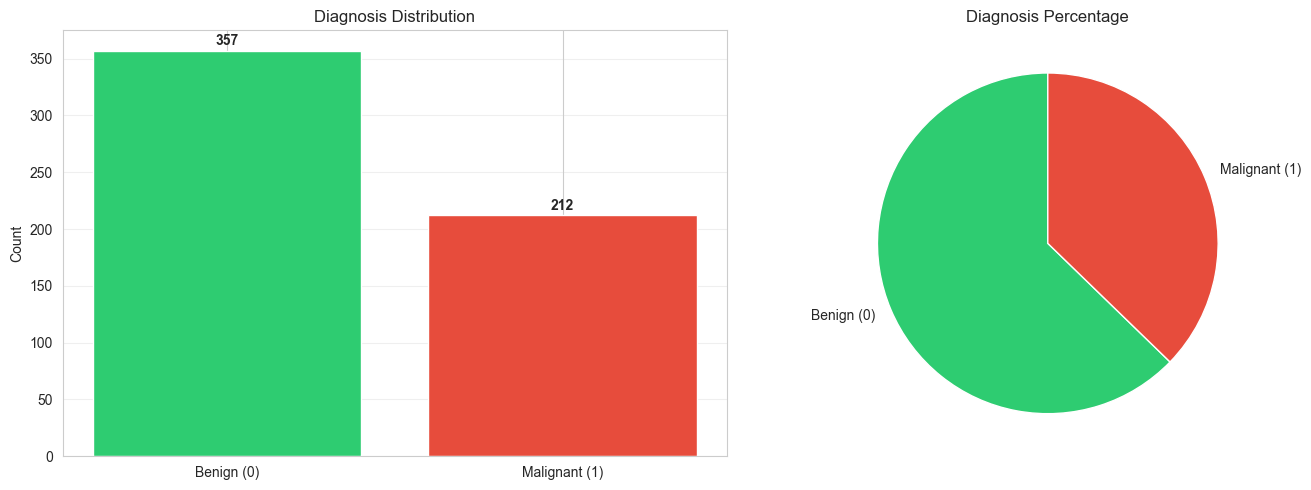

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
ax1 = axes[0]
counts = df['diagnosis'].value_counts().sort_index()  # Sort by index (0, 1)
benign_count = counts.get(0, 0)
malignant_count = counts.get(1, 0)

ax1.bar(['Benign (0)', 'Malignant (1)'], [benign_count, malignant_count], color=['#2ecc71', '#e74c3c'])
ax1.set_ylabel('Count')
ax1.set_title('Diagnosis Distribution')
ax1.grid(axis='y', alpha=0.3)

for i, v in enumerate([benign_count, malignant_count]):
    ax1.text(i, v + 5, str(v), ha='center', fontweight='bold')

# Pie chart
ax2 = axes[1]
ax2.pie([benign_count, malignant_count], 
        labels=['Benign (0)', 'Malignant (1)'], 
        colors=['#2ecc71', '#e74c3c'],
        startangle=90)
ax2.set_title('Diagnosis Percentage')

plt.tight_layout()
plt.show()

## Correlation Analysis - Feature Relationships

**Purpose:** Examine how strongly each feature relates to the diagnosis and identify multicollinearity between features.

**What is Correlation?**
- Statistical measure of linear relationship between two variables

- Range: -1 to +1

- **+1:** Perfect positive correlation (both increase together)- Correlation ≠ causation

- **0:** No linear relationship- Non-linear patterns won't show up (that's why we use ML)

- **-1:** Perfect negative correlation (one increases, other decreases)- Only captures **linear** relationships

**Limitations:**

**Correlation Matrix:**

- 31×31 grid showing correlations between all variables (30 features + diagnosis)  - May still contribute in combination with other features

- Each cell shows correlation between row variable and column variable  - Less predictive power than stronger correlations

- Diagonal is always 1.0 (variable perfectly correlates with itself)  - Weak-moderate positive relationship  

- If `smoothness_mean` has correlation = 0.35 with diagnosis:

**Heat Map Color Coding:**  

- **Red/Warm:** Positive correlation (both variables move in same direction)  - This feature is highly predictive

- **Blue/Cool:** Negative correlation (variables move in opposite directions)  - As concave points increase, malignancy likelihood increases

- **White:** No correlation (variables independent)  - Strong positive relationship

- If `concave_points_worst` has correlation = 0.79 with diagnosis:

**What to Look For:****Interpretation Examples:**



**1. Correlation with Diagnosis (our target):**- Some algorithms handle multicollinearity better than others

- Features with correlation close to +1 or -1 are strong predictors  - Including all won't hurt tree-based models but may affect linear models

- Top 10 most correlated features printed below the heatmap  - All measure similar concept (size)

- These are candidates for feature importance analysis- Example: `radius_mean`, `perimeter_mean`, `area_mean` likely highly correlated

- Highly correlated features (>0.9) provide redundant information
**2. Feature-to-Feature Correlation (Multicollinearity):**

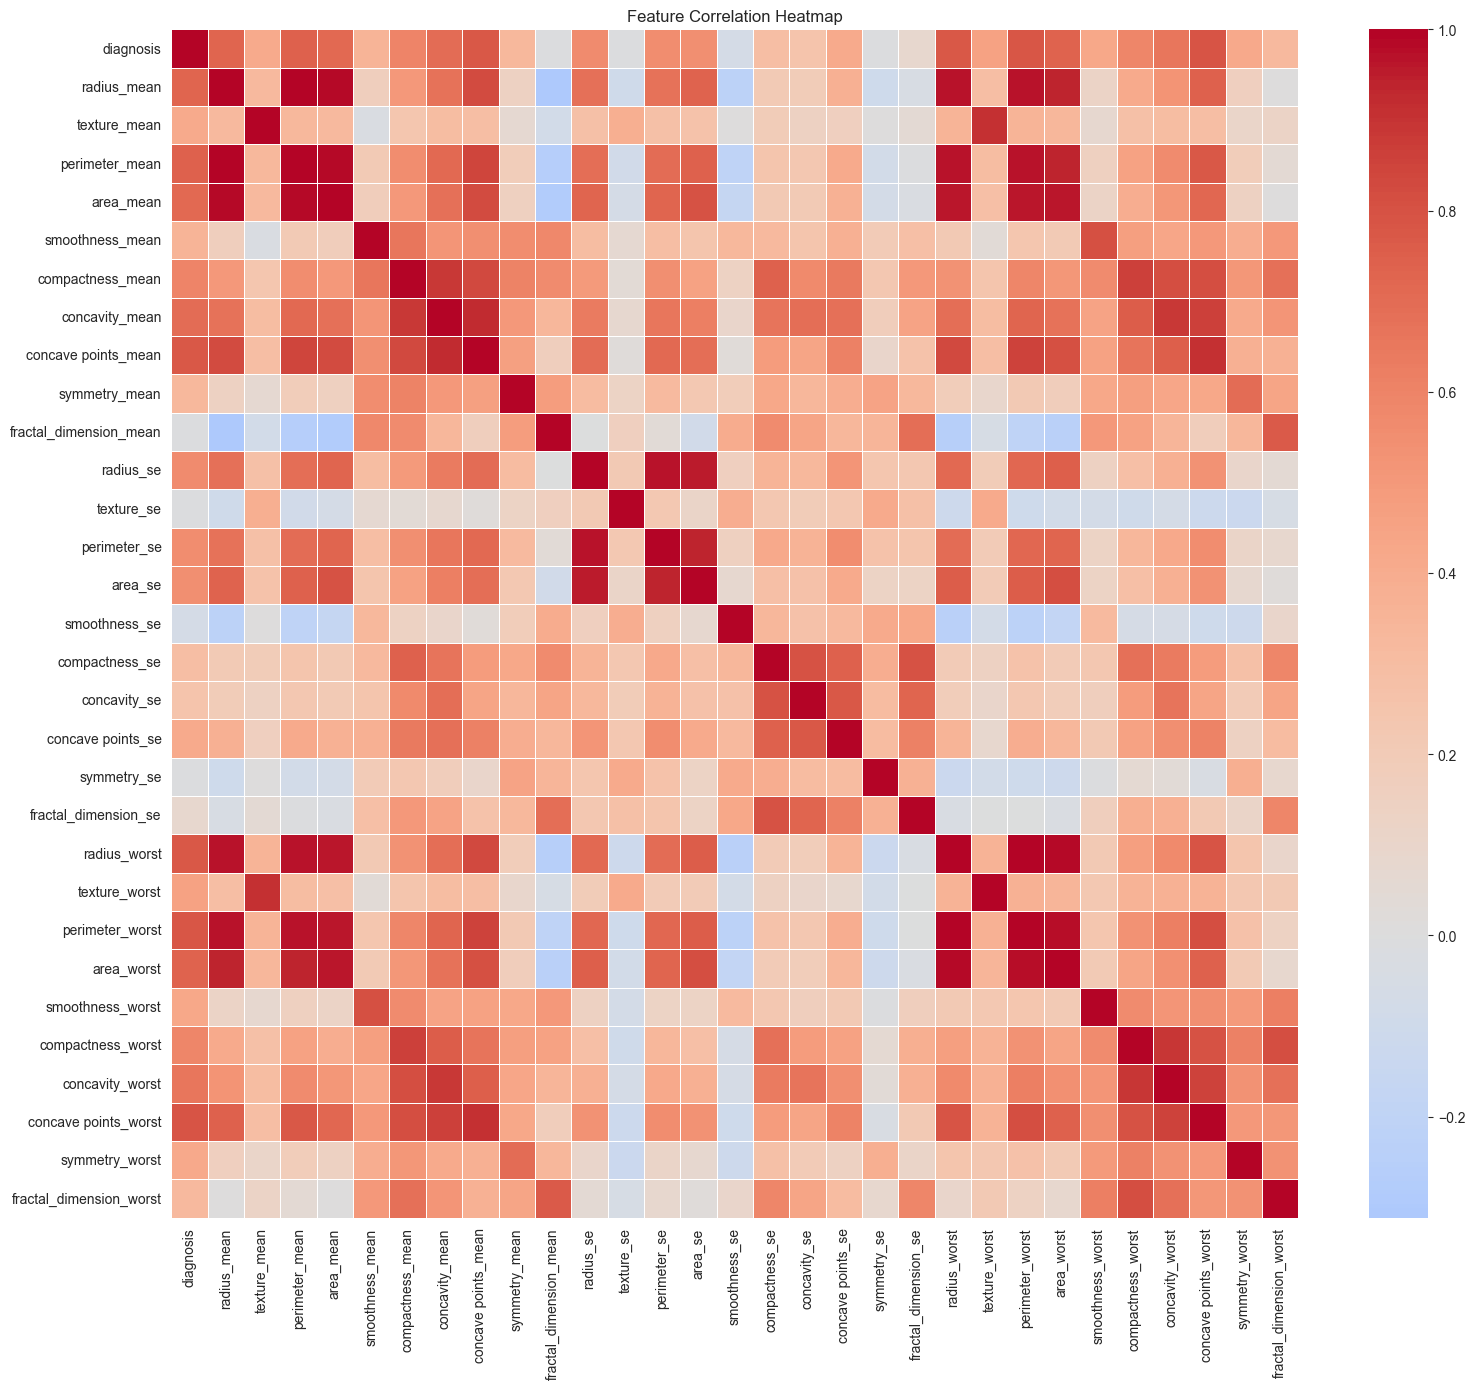


Top 10 features correlated with diagnosis:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


In [41]:
corr_matrix = df.drop('id', axis=1).corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

print("\nTop 10 features correlated with diagnosis:")
corr_with_target = corr_matrix['diagnosis'].sort_values(ascending=False)
print(corr_with_target[1:11])

## Feature Distributions by Diagnosis - Separation Analysis

**Purpose:** Visualize how feature values differ between malignant (cancer) and benign (non-cancer) cases to identify discriminative features.

**What Are We Plotting?**
- **Histograms:** Show frequency distribution of values
- **Overlapping histograms:** Two histograms on same plot (green=benign, red=malignant)
- **6 subplots:** Top 6 features most correlated with diagnosis

**How to Read These Charts:**

**Good Separation (Strong Predictor):**
```
Green bars mostly on left  |||||||||___________
Red bars mostly on right   ___________||||||||
```
- Minimal overlap between green and red
- Clear distinction between benign and malignant values
- Easy for models to learn decision boundary
- Example: If `concave_points_worst` shows this pattern, it's highly predictive

**Poor Separation (Weak Predictor):**
```
Green and red completely overlapped
|||||||||
|||||||||
```
- Distributions look almost identical
- Feature doesn't help distinguish classes
- Model will ignore this feature or give it low weight

**Partial Separation (Moderate Predictor):**
```
Green: ||||||||||||_______
Red:   ____||||||||||||___
```
- Some overlap but distributions shifted
- Helps prediction but not decisive alone
- Useful in combination with other features

**What Different Patterns Mean:**

**1. Right-Shifted Red Distribution:**
- Malignant cases have higher values
- Positive correlation with cancer
- Example: Larger tumor size, more irregular shapes

**2. Left-Shifted Red Distribution:**
- Malignant cases have lower values  
- Negative correlation with cancer
- Less common in this dataset

**3. Different Spread:**
- One distribution wider than the other
- Indicates more variability in that class
- Can help models detect uncertainty

**Code Explanation:**
- `corr_with_target[1:7]`: Select top 6 most correlated features (skip diagnosis itself at [0])
- `df[df['diagnosis'] == 0][feature]`: Filter to benign cases only
- `df[df['diagnosis'] == 1][feature]`: Filter to malignant cases only
- `ax.hist(..., alpha=0.6)`: Transparency allows overlap to be visible
- `bins=30`: Divides data into 30 intervals for histogram bars

**What You Should See:**
- Clear separation for top features (confirming high correlation)
- Malignant tumors generally have higher values for "worst" measurements
- These are the features models will rely on most heavily


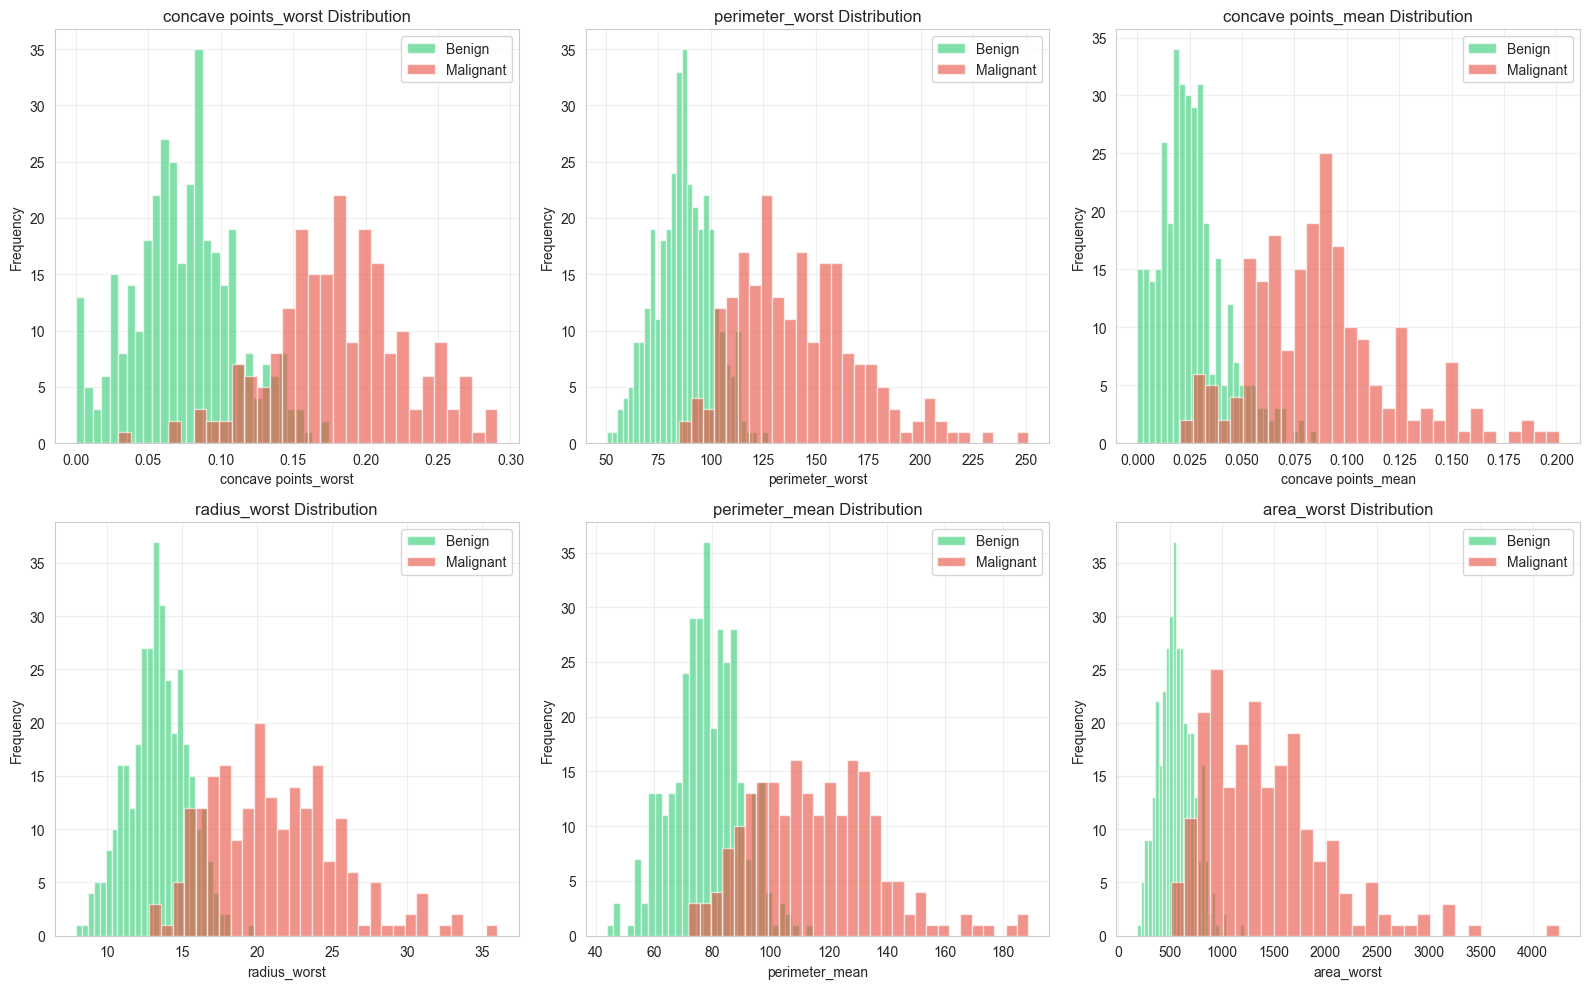

In [42]:
# Select top correlated features for visualization
top_features = corr_with_target[1:7].index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    ax = axes[i]
    benign = df[df['diagnosis'] == 0][feature]
    malignant = df[df['diagnosis'] == 1][feature]
    
    ax.hist(benign, bins=30, alpha=0.6, label='Benign', color='#2ecc71')
    ax.hist(malignant, bins=30, alpha=0.6, label='Malignant', color='#e74c3c')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{feature} Distribution')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# PART 3: MODEL TRAINING & EVALUATION


## Split Data (Stratified)

80/20 train-test split maintaining class distribution:

**What this does:** Divides data into 80% for training models and 20% for testing. Stratification ensures both sets have the same proportion of malignant/benign cases, preventing bias in evaluation.


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTrain class distribution:\n{y_train.value_counts()}")
print(f"\nTest class distribution:\n{y_test.value_counts()}")

Training set: 455 samples
Test set: 114 samples

Train class distribution:
diagnosis
0    285
1    170
Name: count, dtype: int64

Test class distribution:
diagnosis
0    72
1    42
Name: count, dtype: int64


## Feature Scaling

Apply StandardScaler for distance-based algorithms (improves KNN and LogReg):

**What this does:** Transforms features to have mean=0 and standard deviation=1. This is crucial for distance-based algorithms (KNN, Logistic Regression) because features with larger ranges would otherwise dominate the calculations. For example, area (hundreds) would overpower smoothness (0-1) without scaling.


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling applied successfully")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"\nExample - First feature before scaling: mean={X_train.iloc[:, 0].mean():.2f}, std={X_train.iloc[:, 0].std():.2f}")
print(f"Example - First feature after scaling: mean={X_train_scaled[:, 0].mean():.2f}, std={X_train_scaled[:, 0].std():.2f}")

Scaling applied successfully
Scaled training data shape: (455, 30)

Example - First feature before scaling: mean=14.17, std=3.58
Example - First feature after scaling: mean=-0.00, std=1.00


## Define Evaluation Function

**What this does:** Creates a reusable function to calculate key performance metrics: Accuracy (% correct), Precision (% of positive predictions that are correct), Recall (% of actual positives detected), and F1-Score (harmonic mean of precision and recall).


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

## Train Model 1: Logistic Regression

**What this does:** Trains a linear classification model that predicts probabilities using a logistic function. It's fast, interpretable, and works well as a baseline. Uses scaled data because it's sensitive to feature magnitudes.


In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train_scaled, y_train)

lr_metrics = evaluate_model(lr, X_test_scaled, y_test)
print("Logistic Regression:", {k: f"{v:.4f}" for k, v in lr_metrics.items()})

Logistic Regression: {'Accuracy': '0.9649', 'Precision': '0.9750', 'Recall': '0.9286', 'F1-Score': '0.9512'}


## Train Model 2: Decision Tree

**What this does:** Trains a tree-based model that makes decisions using if-then rules. Regularization parameters (max_depth, min_samples) prevent the tree from becoming too complex and memorizing training data.


In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
dt.fit(X_train, y_train)

dt_metrics = evaluate_model(dt, X_test, y_test)
print("Decision Tree:", {k: f"{v:.4f}" for k, v in dt_metrics.items()})

Decision Tree: {'Accuracy': '0.9123', 'Precision': '1.0000', 'Recall': '0.7619', 'F1-Score': '0.8649'}


## Train Model 3: Random Forest

**What this does:** Trains an ensemble of 100 decision trees, each seeing different subsets of data. Predictions are made by majority vote. This reduces overfitting compared to a single tree and often achieves better accuracy.


In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

rf_metrics = evaluate_model(rf, X_test, y_test)
print("Random Forest:", {k: f"{v:.4f}" for k, v in rf_metrics.items()})

Random Forest: {'Accuracy': '0.9737', 'Precision': '1.0000', 'Recall': '0.9286', 'F1-Score': '0.9630'}


## Train Model 4: K-Nearest Neighbors

**What this does:** Predicts by finding the 5 most similar training samples and using their majority class. Requires scaled data because it uses distance calculations. Simple but can be effective for well-clustered data.


In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_metrics = evaluate_model(knn, X_test_scaled, y_test)
print("K-Nearest Neighbors:", {k: f"{v:.4f}" for k, v in knn_metrics.items()})

K-Nearest Neighbors: {'Accuracy': '0.9561', 'Precision': '0.9744', 'Recall': '0.9048', 'F1-Score': '0.9383'}


## Compare Model Performance

Generate comparison table and visualizations:

**What this does:** Evaluates all 4 models using both test accuracy and 5-fold cross-validation. Cross-validation provides more reliable estimates by testing on multiple data splits. The visualizations make it easy to identify the best performing model.

In [50]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy': [lr_metrics['Accuracy'], dt_metrics['Accuracy'], rf_metrics['Accuracy'], knn_metrics['Accuracy']],
    'Precision': [lr_metrics['Precision'], dt_metrics['Precision'], rf_metrics['Precision'], knn_metrics['Precision']],
    'Recall': [lr_metrics['Recall'], dt_metrics['Recall'], rf_metrics['Recall'], knn_metrics['Recall']],
    'F1-Score': [lr_metrics['F1-Score'], dt_metrics['F1-Score'], rf_metrics['F1-Score'], knn_metrics['F1-Score']]
})

print(results.to_string(index=False))

              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.964912   0.975000 0.928571  0.951220
      Decision Tree  0.912281   1.000000 0.761905  0.864865
      Random Forest  0.973684   1.000000 0.928571  0.962963
                KNN  0.956140   0.974359 0.904762  0.938272


## Visualize Model Comparison


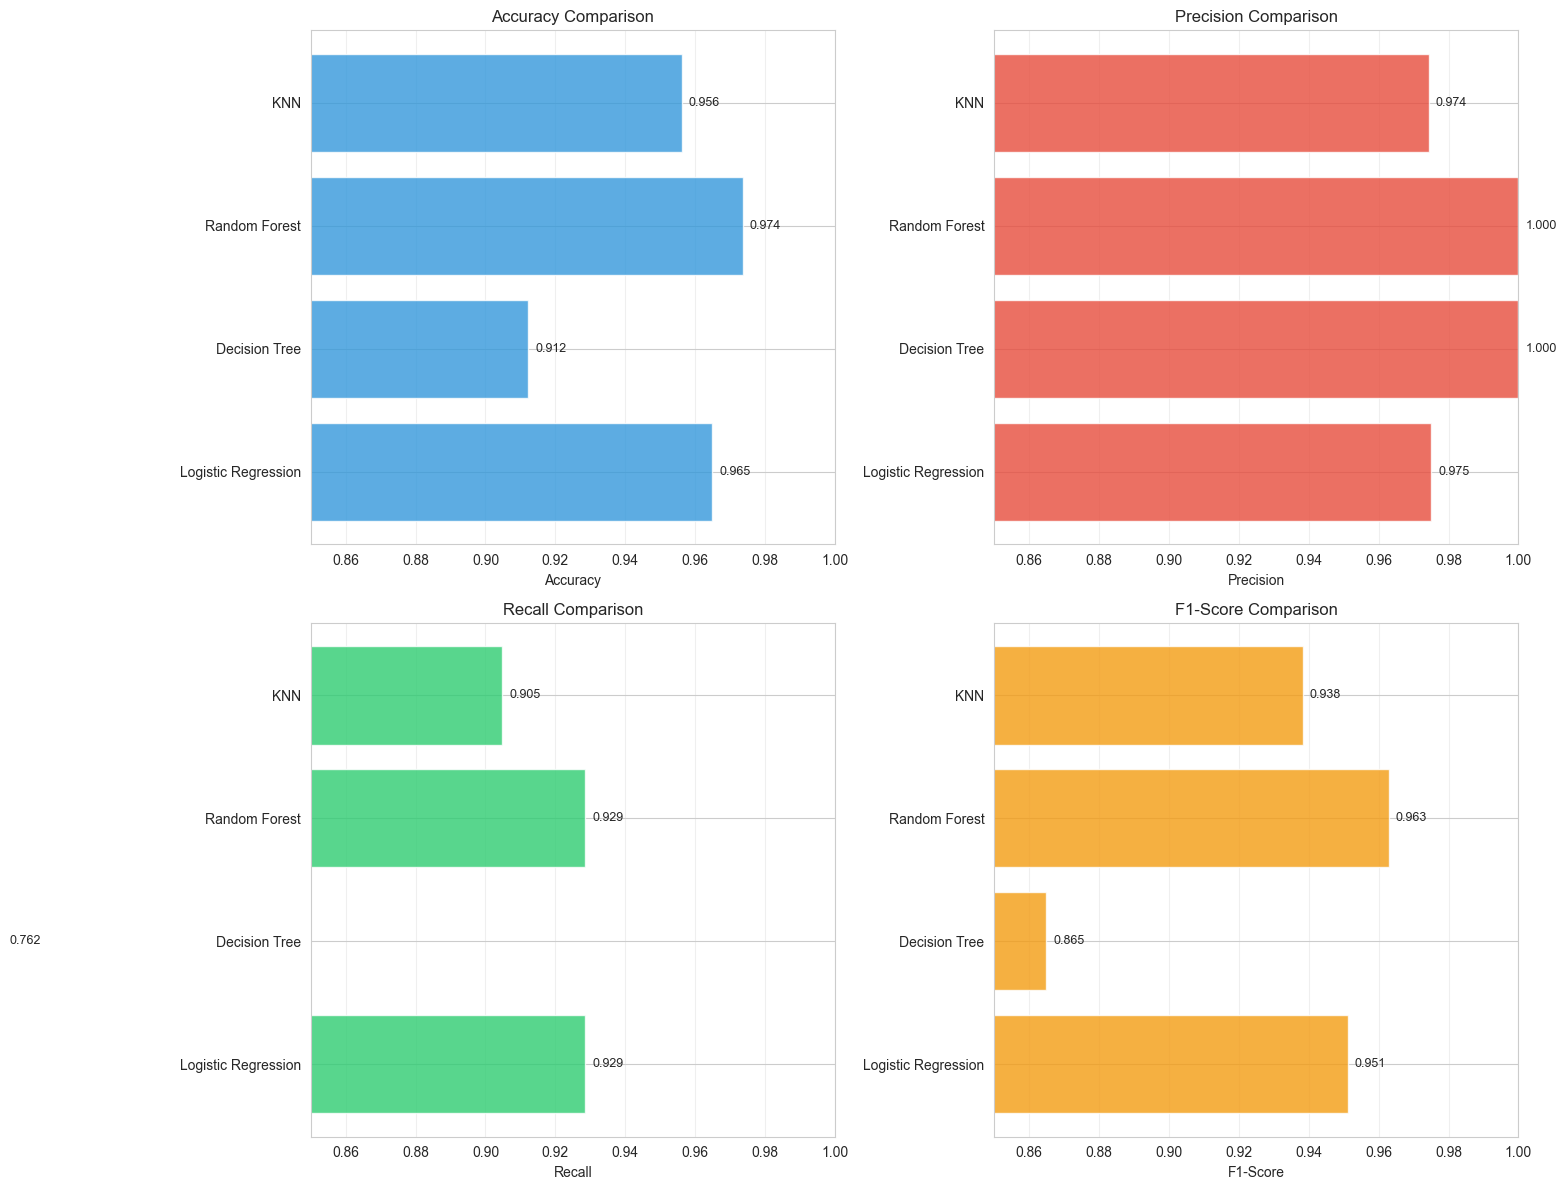


5-Fold Cross-Validation Scores:
Logistic Regression: 0.9714 (±0.0112)
Decision Tree: 0.9275 (±0.0345)
Random Forest: 0.9560 (±0.0326)
KNN: 0.9626 (±0.0237)


In [51]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bars = ax.barh(results['Model'], results[metric], color=colors[idx], alpha=0.8)
    ax.set_xlabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.set_xlim([0.85, 1.0])
    ax.grid(axis='x', alpha=0.3)
    
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 0.002, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

from sklearn.model_selection import cross_val_score

print("\n5-Fold Cross-Validation Scores:")
models_dict = {
    'Logistic Regression': (lr, X_train_scaled),
    'Decision Tree': (dt, X_train),
    'Random Forest': (rf, X_train),
    'KNN': (knn, X_train_scaled),
}

for name, (model, X_data) in models_dict.items():
    scores = cross_val_score(model, X_data, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f} (±{scores.std():.4f})")

## Feature Importance Analysis

Analyze which features are most important for prediction:

**What this shows:** Which features the model relies on most heavily for predictions. High importance features are the key indicators the model uses to distinguish malignant from benign cases. This provides medical insights into cancer diagnosis.

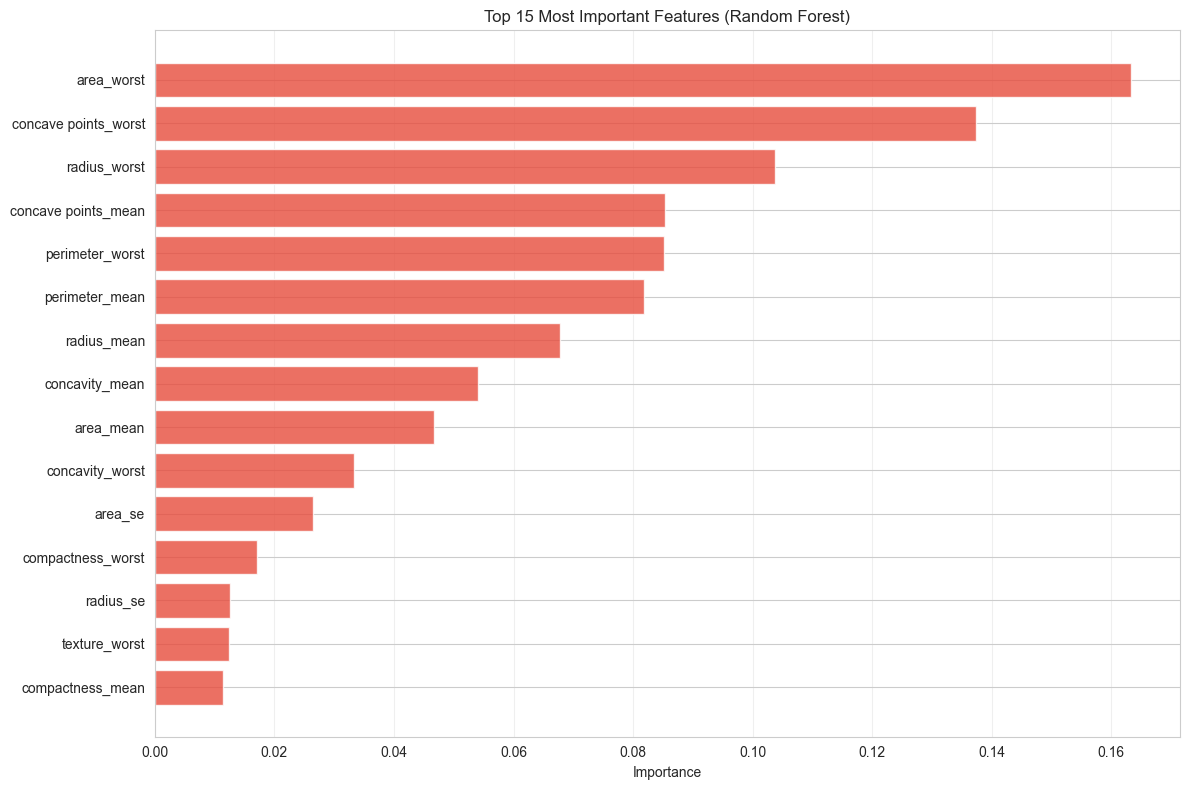


Top 10 Most Important Features:
             Feature  Importance
          area_worst    0.163332
concave points_worst    0.137328
        radius_worst    0.103803
 concave points_mean    0.085409
     perimeter_worst    0.085095
      perimeter_mean    0.081884
         radius_mean    0.067783
      concavity_mean    0.054107
           area_mean    0.046690
     concavity_worst    0.033300


In [52]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'][:15], feature_importance['Importance'][:15], color='#e74c3c', alpha=0.8)
plt.xlabel('Importance')
plt.title('Top 15 Most Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

## Confusion Matrix Analysis

Detailed breakdown of prediction errors (FN are critical in cancer diagnosis):

**What this shows:** Detailed breakdown of correct and incorrect predictions. In cancer diagnosis, False Negatives (missing cancer cases) are most critical as they mean patients with cancer go untreated. True Positives and True Negatives show correct predictions.

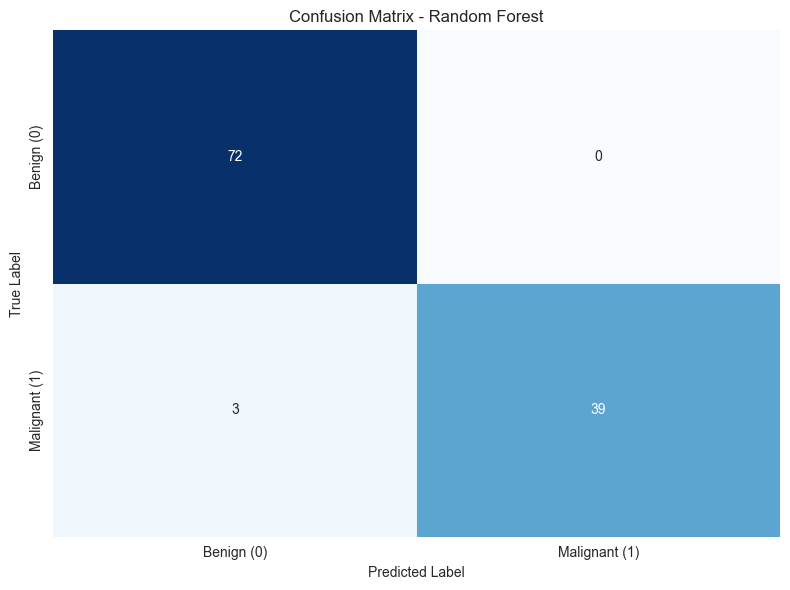


Confusion Matrix Breakdown:
True Negatives (TN): 72 - Correctly identified benign
False Positives (FP): 0 - Benign predicted as malignant
False Negatives (FN): 3 - Malignant predicted as benign (CRITICAL)
True Positives (TP): 39 - Correctly identified malignant


In [53]:
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN): {tn} - Correctly identified benign")
print(f"False Positives (FP): {fp} - Benign predicted as malignant")
print(f"False Negatives (FN): {fn} - Malignant predicted as benign (CRITICAL)")
print(f"True Positives (TP): {tp} - Correctly identified malignant")

## Final Performance Summary

Comprehensive summary of all validation metrics:

**What this shows:** A complete performance report showing the Random Forest model's test set performance and confusion matrix metrics.

In [54]:
print("="*60)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*60)
print(f"\nModel: Random Forest Classifier")
print(f"Dataset: Wisconsin Breast Cancer (569 samples, 30 features)")
print(f"Train/Test Split: 80/20 stratified")
print("\n" + "-"*60)
print("TEST SET PERFORMANCE")
print("-"*60)
print(f"Accuracy:  {rf_metrics['Accuracy']:.4f}")
print(f"Precision: {rf_metrics['Precision']:.4f}")
print(f"Recall:    {rf_metrics['Recall']:.4f}")
print(f"F1-Score:  {rf_metrics['F1-Score']:.4f}")

print("\n" + "-"*60)
print("CONFUSION MATRIX")
print("-"*60)
print(f"True Negatives:  {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn} (CRITICAL in cancer diagnosis)")
print(f"True Positives:  {tp}")
print("="*60)

FINAL MODEL PERFORMANCE SUMMARY

Model: Random Forest Classifier
Dataset: Wisconsin Breast Cancer (569 samples, 30 features)
Train/Test Split: 80/20 stratified

------------------------------------------------------------
TEST SET PERFORMANCE
------------------------------------------------------------
Accuracy:  0.9737
Precision: 1.0000
Recall:    0.9286
F1-Score:  0.9630

------------------------------------------------------------
CONFUSION MATRIX
------------------------------------------------------------
True Negatives:  72
False Positives: 0
False Negatives: 3 (CRITICAL in cancer diagnosis)
True Positives:  39
